In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import time

path = "/data/users/rockyliu/fbsource/fbcode/experimental/rockyliu/mnist/data/"
testInput = "t10k-images-idx3-ubyte"
testLabel = "t10k-labels-idx1-ubyte"

with open(path + testInput, "rb") as f:
    eval_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28, 28)

with open(path + testLabel, "rb") as f:
    labels = np.frombuffer(f.read(), np.uint8, offset=8)

def getTitle(index, probs, output):
    return "O={} L={} OP={:.2F} LP={:.2F}".format(output, labels[index], float(probs[output]) * 100, float(probs[labels[index]]) * 100)

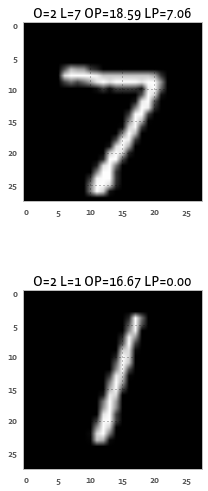

In [3]:
def show_images(images, titles, cols = 1):
    n_images = len(images)
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(np.ceil(n_images/float(cols)), cols, n + 1)
        plt.imshow(image, cmap='gray')
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
evalPath = "../evaluation.out"

with open(path + evalPath, "r") as f:
    lines = [x for x in f][:2]
    images = [eval_images[int(line.split()[0])] for line in lines]
    titles = [getTitle(int(line.split()[0]), line.split()[2:12], int(line.split()[13])) for line in lines]
    show_images(images, titles, 1)

100


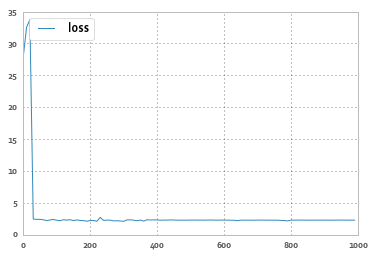

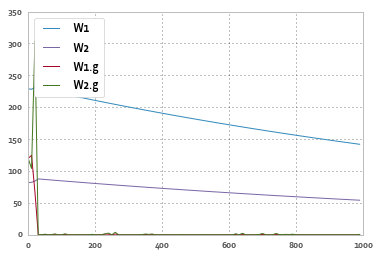

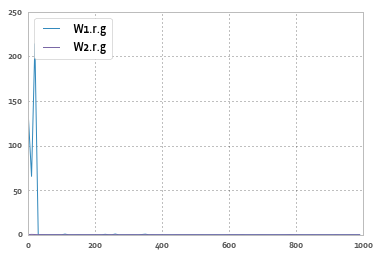

In [35]:
import matplotlib.animation as anim

learningCurvePath = "../learning.curve"

def readCurve():
    with open(path + learningCurvePath, "r") as f:
        lines = [x.split() for x in f]
    return np.array(lines, dtype=float)

curve = readCurve()[:100]
print(len(curve))

# loss

fig = plt.figure()

plt.plot(curve[:, 0], curve[:, 1], label = "loss")
plt.legend(loc='upper left')
plt.show()

# parameter and gradients

fig = plt.figure()

plt.plot(curve[:, 0], curve[:, 2], label = "W1")
plt.plot(curve[:, 0], curve[:, 4], label = "W2")

# plt.plot(curve[:, 0], np.log(curve[:, 3]), label = "B1")
# plt.plot(curve[:, 0], np.log(curve[:, 5]), label = "B2")

plt.plot(curve[:, 0], curve[:, -2], label = "W1.g")
plt.plot(curve[:, 0], curve[:, -4], label = "W2.g")

plt.legend(loc='upper left')
plt.show()

# regularization gradients

fig = plt.figure()
plt.plot(curve[:, 0], curve[:, -6], label = "W1.r.g")
plt.plot(curve[:, 0], curve[:, -5], label = "W2.r.g")
plt.legend(loc='upper left')
plt.show()

    
# animHolder = anim.FuncAnimation(fig, plotCurve, interval=1000)

In [22]:
%%javascript

var handle = window.setTimeout(function() {Jupyter.notebook.execute_cells([2]);}, 10000)




<IPython.core.display.Javascript object>

In [473]:
x = [1, 2, 3]
x[-1]

3